In [99]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
import os
from PIL import Image
from sklearn.model_selection import train_test_split

In [100]:
def display(img):
    dpi = 80
    im_data = img

    height, width  = im_data.shape[:2]

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()


In [101]:

def preProcessing(myImage):
    grayImg = cv2.cvtColor(myImage, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(grayImg, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    print(f'The threshold valua applied to the image is: {ret} ')
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
    dilation = cv2.dilate(thresh1, horizontal_kernel, iterations=1)
    horizontal_contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    im2 = myImage.copy()
    for cnt in horizontal_contours:
        x, y, w, h = cv2.boundingRect(cnt)
        rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (255, 255, 255), 0)
    im2, vertical_contours = seg_word(rect)
    return im2, vertical_contours


def seg_word(wordImage):
    grayImg = cv2.cvtColor(wordImage, cv2.COLOR_BGR2GRAY)
    ret, thresh2 = cv2.threshold(grayImg, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    # create a Structuring Element size of 8*10 for the vertical contouring
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 10))
    # apply Dilation for once only
    dilation = cv2.dilate(thresh2, vertical_kernel, iterations=1)
    #fingd the vertical contours
    vertical_contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    word_img = wordImage.copy()
    # Run through each contour and extract the bounding box
    for cnt in vertical_contours:
        #computes the minimum rectangle
        x, y, w, h = cv2.boundingRect(cnt)
        # Draw a rectangular from the top left to the bottom right with the
        # given Coordinates x,y and height and width
        rect = cv2.rectangle(word_img, (x, y), (x + w, y + h), (0, 255, 0), 0)
    # apply a Character Segmentation and return the output Image

    return word_img, vertical_contours

In [102]:
# Define the paths to the folders
italics_folder = 'output_images'
normal_folder = 'normal_images'

# Initialize empty lists for data and labels
X_data = []
Y_data = []

# Load images from italics folder
for i in range(1, 4001):
    # Construct the image path
    image_path = os.path.join(italics_folder, f'image_{i}.png')

    # Open the image and convert it to grayscale
    image = Image.open(image_path)
    image = np.array(image)
    # gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # binary_image = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    # Append the image data and label to the lists
    X_data.append(image)
    Y_data.append(1)

# Load images from normal folder
for i in range(1, 4001):
    # Construct the image path
    image_path = os.path.join(normal_folder, f'image_{i}.png')

    # Open the image and convert it to grayscale
    image = Image.open(image_path)
    image = np.array(image)
    # gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # binary_image = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    # Append the image data and label to the lists
    X_data.append(image)
    Y_data.append(0)

# Convert lists to numpy arrays
Y_data = np.array(Y_data)

In [103]:
print(len(X_data))
print(len(Y_data))

8000
8000


In [104]:
X_data1 = []
for i in range(len(X_data)):
    ## segmentation
    image = X_data[i]
    im2, vertical_contours = preProcessing(image)
    # display(im2)
    x,y,w,h
    for cnt in vertical_contours:
        x, y, w, h = cv2.boundingRect(cnt)
    
    word = X_data[i][y:y+h, x:x+w]
    # display(word)
    X_data1.append(word)
    print(i)
    # display(im2)

The threshold valua applied to the image is: 141.0 
0
The threshold valua applied to the image is: 141.0 
1
The threshold valua applied to the image is: 142.0 
2
The threshold valua applied to the image is: 140.0 
3
The threshold valua applied to the image is: 141.0 
4
The threshold valua applied to the image is: 141.0 
5
The threshold valua applied to the image is: 141.0 
6
The threshold valua applied to the image is: 141.0 
7
The threshold valua applied to the image is: 140.0 
8
The threshold valua applied to the image is: 141.0 
9
The threshold valua applied to the image is: 142.0 
10
The threshold valua applied to the image is: 141.0 
11
The threshold valua applied to the image is: 142.0 
12
The threshold valua applied to the image is: 142.0 
13
The threshold valua applied to the image is: 140.0 
14
The threshold valua applied to the image is: 141.0 
15
The threshold valua applied to the image is: 141.0 
16
The threshold valua applied to the image is: 141.0 
17
The threshold valua 

In [105]:
print(X_data1[0].shape)

(33, 119, 3)


In [128]:
X_data = []
for i in range(len(X_data1)):
    image = X_data1[i]
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    binary_image = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    
    X_data.append(binary_image)

In [129]:
X_data[0].shape

(33, 119)

In [130]:
## bicubic interpolation to make all the images of same sizeimport numpy as np
from PIL import Image

new_size = (200, 200)

resized_images = []
for image in X_data:
  resized_image = Image.fromarray(image).resize(new_size, Image.BICUBIC)
  resized_images.append(np.array(resized_image))

X_data = np.array(resized_images)

In [131]:
print(X_data[0].shape)

(200, 200)


In [109]:
len(y_test)

1600

In [110]:
len(X_test)

1600

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 4)

In [139]:
X_train[0].shape

(200, 200)

In [117]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, Activation, Dropout, Flatten, Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam
from sklearn.tree import DecisionTreeClassifier

In [141]:
batch_size = 16
nb_classes =2
nb_epochs = 3
img_rows, img_columns = 200, 200
img_channel = 1
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [134]:
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((200, 200, 1), input_shape=(200, 200)),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)  # Output classes = 2
])

In [136]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_6 (Reshape)         (None, 200, 200, 1)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 200, 200, 32)      320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 100, 100, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 50, 50, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 50, 50, 32)       

In [142]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size = batch_size, epochs = nb_epochs, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/3
400/400 [==============================] - 122s 303ms/step - loss: 0.1534 - accuracy: 0.9506 - val_loss: 0.0619 - val_accuracy: 0.9769
Epoch 2/3
400/400 [==============================] - 121s 303ms/step - loss: 0.0801 - accuracy: 0.9727 - val_loss: 0.1266 - val_accuracy: 0.9600
Epoch 3/3
400/400 [==============================] - 121s 302ms/step - loss: 0.0507 - accuracy: 0.9853 - val_loss: 0.0640 - val_accuracy: 0.9806


In [143]:
score = model.evaluate(X_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  0.06397942453622818
Test accuracy:  0.9806249737739563


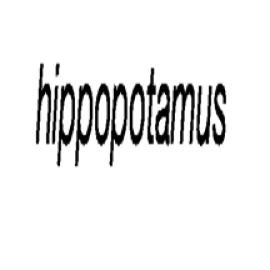

In [166]:
test_img = cv2.imread("test.jpg")
gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
binary_image = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
resized_image = Image.fromarray(binary_image).resize(new_size, Image.BICUBIC)
test_img = np.array(resized_image)
display(test_img)
test_array = [test_img]
test = np.array(test_array)

In [163]:
print(test.shape)

(1, 200, 200)


In [165]:
predictions = model.predict(test)
predicted_class = np.argmax(predictions)

print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 104ms/step
Predicted class: 1


In [167]:
model.save('model.h5')

C:\Users\Adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
